## Filtros Recursivos de polo único

Vamos a intentar implementar un filtro recursivo que emule a un filtro analógico de polo único, tipo RC.

Puede ser pasa bajo, alto, pasa banda o rechaza banda (notch).

Fc=500 Fcn=0.05 x=0.7304026910486456
Fc=500 Fcn=0.05 x=0.7304026910486456


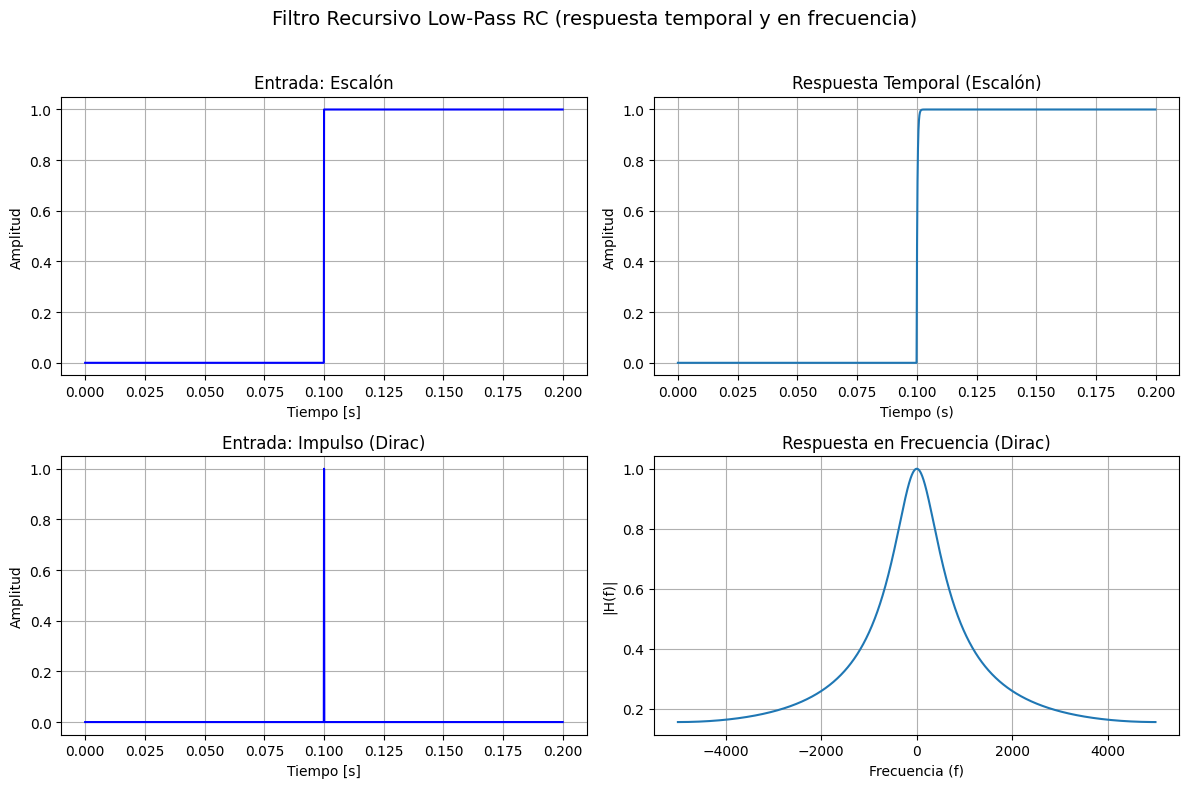

In [6]:
# Filtro Recursivo que emula un low pass analógico
import numpy as np
import matplotlib.pyplot as plt

# ==== Parámetros ====
N = 2000             # número de muestras
fs = 10000           # frecuencia de muestreo [Hz]
fc = 500           # frecuencia de corte [Hz]
t = np.arange(0, N/fs, 1/fs)  # base de tiempo

# ==== Señales de entrada ====
dirac = np.zeros(N)
dirac[N//2] = 1  # impulso centrado

step = np.concatenate((np.zeros(N//2), np.ones(N//2)))  # escalón

# ==== Definición del filtro ====
def lowPassRC(fc, input_signal):
    fcn = fc / fs
    x = np.exp(-2 * np.pi * fcn)
    a0 = 1 - x
    b1 = x
    print(f"Fc={fc} Fcn={fcn} x={x}")

    output_signal = np.zeros_like(input_signal)
    for i in range(1, len(input_signal)):
        output_signal[i] = a0 * input_signal[i] + b1 * output_signal[i-1]

    return output_signal

# ==== Respuestas ====
step_resp = lowPassRC(fc, step)
dirac_resp = lowPassRC(fc, dirac)

# ==== Transformadas (respuestas en frecuencia) ====
def compute_freq_response(signal, fs):
    N = len(signal)
    spectrum = np.fft.fftshift(np.fft.fft(signal))
    mag = np.abs(spectrum)
    freq = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))  # eje de frecuencia en Hz
    return freq, mag


freq_step, mag_step = compute_freq_response(step_resp, fs)
freq_dirac, mag_dirac = compute_freq_response(dirac_resp, fs)

# ==== Ploteo ploteo ploteo ====
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Filtro Recursivo Low-Pass RC (respuesta temporal y en frecuencia)", fontsize=14)

# Escalón y respuesta
axs[0, 0].plot(t, step, color='blue')
axs[0, 0].set_title("Entrada: Escalón")
axs[0, 0].set_xlabel("Tiempo [s]")
axs[0, 0].set_ylabel("Amplitud")
axs[0, 0].grid(True)

axs[0, 1].plot(t, step_resp)
axs[0, 1].set_title("Respuesta Temporal (Escalón)")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Amplitud")
axs[0, 1].grid(True)

# Impulso y respuesta
axs[1, 0].plot(t, dirac, color='blue')
axs[1, 0].set_title("Entrada: Impulso (Dirac)")
axs[1, 0].set_xlabel("Tiempo [s]")
axs[1, 0].set_ylabel("Amplitud")
axs[1, 0].grid(True)


axs[1, 1].plot(freq_dirac, mag_dirac)
axs[1, 1].set_title("Respuesta en Frecuencia (Dirac)")
axs[1, 1].set_xlabel("Frecuencia (f)")
axs[1, 1].set_ylabel("|H(f)|")
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Apliquemos nuestro filtro a una señal de prueba

Probaremos si realmente filtra como esperabamos. 
Se puede ir variando la señal de prueba y la frecuencia de corte que se setea.

Fc=500 Fcn=0.05 x=0.7304026910486456


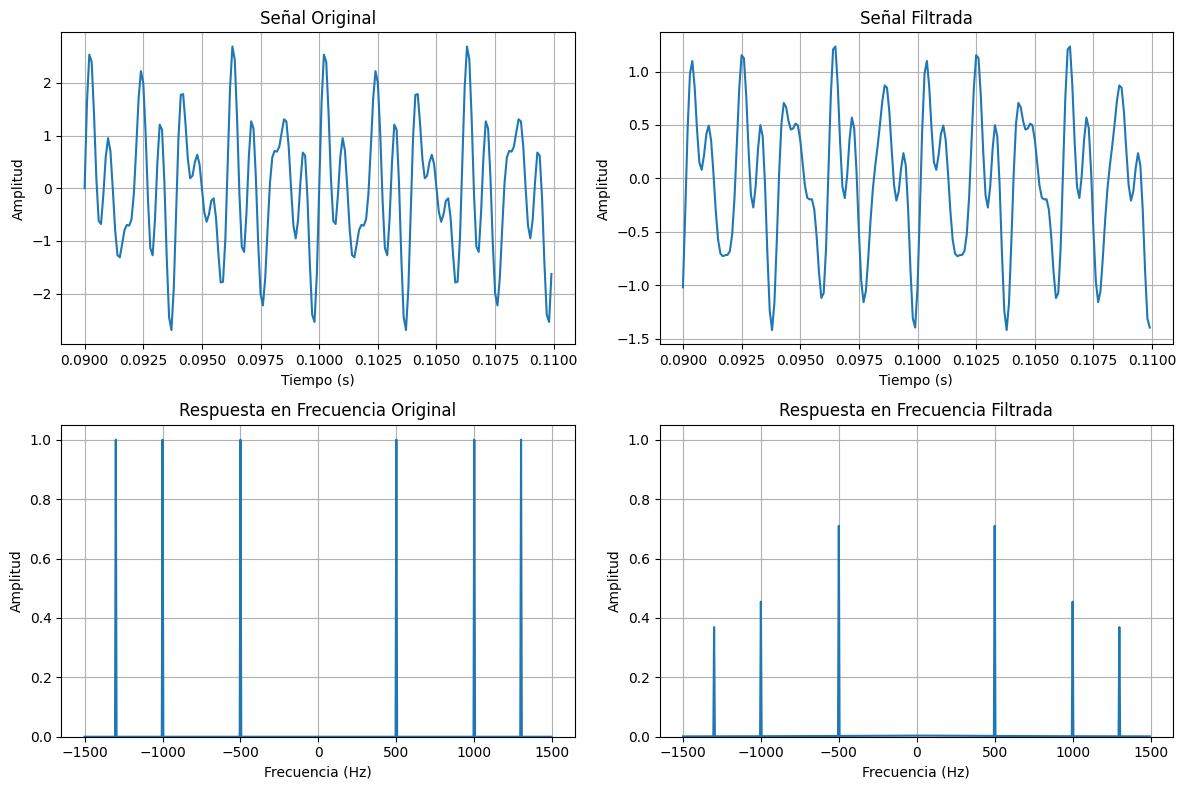

In [8]:
f1=500
f2=1000
f3=1300
test_signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

filtered_signal = lowPassRC(500, test_signal)

freq, test_fresp = compute_freq_response(test_signal,fs)

freq_filtered, filtered_resp = compute_freq_response(filtered_signal,fs)


# PLOTEOO 
show_samples = 100
t_inferior = int(N/2) - show_samples
t_superior = int(N/2) + show_samples

show_norm_freq = 300
f_inferior = int(len(freq)/2) - show_norm_freq
f_superior = int(len(freq)/2) + show_norm_freq

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0,0].plot(t[t_inferior:t_superior], test_signal[t_inferior:t_superior])
axs[0,0].set_title('Señal Original')
axs[0,0].set_xlabel('Tiempo (s)')
axs[0,0].set_ylabel('Amplitud')
axs[0,0].grid(True)

axs[0,1].plot(t[t_inferior:t_superior], filtered_signal[t_inferior:t_superior])
axs[0,1].set_title('Señal Filtrada')
axs[0,1].set_xlabel('Tiempo (s)')
axs[0,1].set_ylabel('Amplitud')
axs[0,1].grid(True)

axs[1,0].plot(freq[f_inferior:f_superior], test_fresp[f_inferior:f_superior]/1000)
axs[1,0].set_title('Respuesta en Frecuencia Original')
axs[1,0].set_xlabel('Frecuencia (Hz)')
axs[1,0].set_ylabel('Amplitud')
axs[1,0].set_ylim(0,1.05)
axs[1,0].grid(True)

axs[1,1].plot(freq_filtered[f_inferior:f_superior], filtered_resp[f_inferior:f_superior]/1000)
axs[1,1].set_title('Respuesta en Frecuencia Filtrada')
axs[1,1].set_xlabel('Frecuencia (Hz)')
axs[1,1].set_ylabel('Amplitud')
axs[1,1].set_ylim(0,1.05)
axs[1,1].grid(True)

plt.tight_layout()
plt.show()